### **Japanese Salary**

In this notebook I will try to predict, whether a person working in Japan has or has not salary over 50r monthly. In this project I deal with many common problems of real life data: the target classes a highly imbalanced and there are lots of categorical variables with dozens of categories. 

To handle the problem I tried log regression, decision trees/forests and naive bayes algorithm as well as neural networks

In [ ]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [ ]:
ds_data = pd.read_csv('/content/drive/MyDrive/salary.csv')

In [ ]:
ds_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## **Data Cleaning**

Firstly, let's create a binary salary variable which will be our target

In [ ]:
ds_data['sal_bin'] = np.where(ds_data['salary'] == ' <=50K', 0, 1)
ds_data = ds_data.drop(['salary'], axis = 1)
ds_data = ds_data.drop(['fnlwgt'], axis = 1)
ds_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

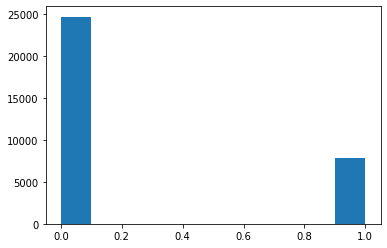

In [ ]:
plt.hist(ds_data['sal_bin'])

Now, let's deal with many categorical variables

In [ ]:
collections.Counter(list(ds_data.workclass))

Counter({' ?': 1836,
         ' Federal-gov': 960,
         ' Local-gov': 2093,
         ' Never-worked': 7,
         ' Private': 22696,
         ' Self-emp-inc': 1116,
         ' Self-emp-not-inc': 2541,
         ' State-gov': 1298,
         ' Without-pay': 14})

We see that there is '?' value which indicates a missing. We will replace it with NaN for all columns and see how many rows we are missing

In [ ]:
ds_data = ds_data.replace(' ?', np.nan)

In [ ]:
ds_data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
sal_bin              0
dtype: int64

We see thath NaNs are only in one interesting variable for us - country. So, we will delete rows with nans in native-countery, since there are only 583 of them, and impute the rest 

In [ ]:
ds_data = ds_data.drop(ds_data[ds_data['native-country'].isna()].index)

In [ ]:
ds_data.isna().sum()

age                  0
workclass         1809
education            0
education-num        0
marital-status       0
occupation        1816
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
sal_bin              0
dtype: int64

These variable is categorical and there is only one categorical imputer available, that uses frq

In [ ]:
!pip install feature_engine

In [ ]:
from feature_engine.imputation import CategoricalImputer

In [ ]:
imputer = CategoricalImputer(imputation_method = 'frequent', variables=['workclass', 'occupation'])

In [ ]:
ds_data = imputer.fit_transform(ds_data)
ds_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


We will have have several binary variable: government, private and self-employement. Never-worked and without-pay rows will be dropped since these people are out of the scope of the research.

In [ ]:
ds_data['gov_occup'] = np.where((ds_data['workclass'] == ' Federal-gov')|(ds_data['workclass'] == ' Local-gov')|(ds_data['workclass'] == ' State-gov'), 1,0)

ds_data['private_occup'] = np.where(ds_data['workclass'] == ' Private', 1,0)

ds_data['self_occup'] = np.where((ds_data['workclass'] == ' Self-emp-inc')|(ds_data['workclass'] == ' Self-emp-inc'), 1,0)

ds_data = ds_data.drop(ds_data[(ds_data.workclass == ' Never-worked')|(ds_data.workclass == ' Without-pay')].index)

ds_data = ds_data.drop(['workclass'], axis = 1)

In [ ]:
ds_data

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal_bin,gov_occup,private_occup,self_occup
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1,0,0
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1,0
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1,0
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0,1,0
32557,40,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0,1,0
32558,58,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,1,0
32559,22,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,1,0


In [ ]:
collections.Counter(list(ds_data.education))

Counter({' 10th': 919,
         ' 11th': 1166,
         ' 12th': 417,
         ' 1st-4th': 163,
         ' 5th-6th': 318,
         ' 7th-8th': 625,
         ' 9th': 506,
         ' Assoc-acdm': 1054,
         ' Assoc-voc': 1366,
         ' Bachelors': 5210,
         ' Doctorate': 390,
         ' HS-grad': 10358,
         ' Masters': 1674,
         ' Preschool': 50,
         ' Prof-school': 559,
         ' Some-college': 7182})

Education is an ordered variable, so we will create a numeric variable 'education_level'. Numeric education-num does not fit us since some of the groups (like 'preschool') are underrepresented in the dataset.

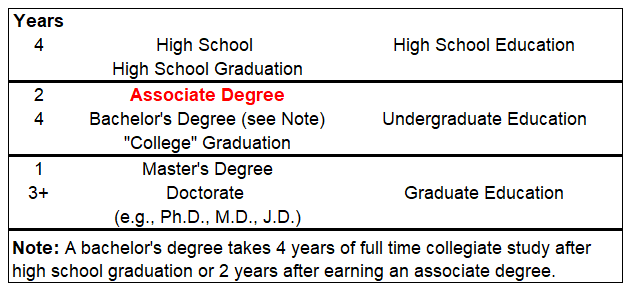

In [ ]:
ds_data.loc[ds_data["education"] == " Preschool", "education"] = 0
ds_data.loc[ds_data["education"] == " 1st-4th", "education"] = 0
ds_data.loc[ds_data["education"] == " 5th-6th", "education"] = 0
ds_data.loc[ds_data["education"] == " 7th-8th", "education"] = 0
ds_data.loc[ds_data["education"] == " 7th-8th", "education"] = 0
ds_data.loc[ds_data["education"] == " 9th", "education"] = 0
ds_data.loc[ds_data["education"] == " 10th", "education"] = 0
ds_data.loc[ds_data["education"] == " 11th", "education"] = 0
ds_data.loc[ds_data["education"] == " 12th", "education"] = 0
ds_data.loc[ds_data["education"] == " Prof-school", "education"] = 0

ds_data.loc[ds_data["education"] == " HS-grad", "education"] = 1

ds_data.loc[ds_data["education"] == " Assoc-acdm", "education"] = 2
ds_data.loc[ds_data["education"] == " Assoc-voc", "education"] = 2

ds_data.loc[ds_data["education"] == " Bachelors", "education"] = 3
ds_data.loc[ds_data["education"] == " Some-college", "education"] = 3

ds_data.loc[ds_data["education"] == " Masters", "education"] = 4
ds_data.loc[ds_data["education"] == " Doctorate", "education"] = 4

In [ ]:
ds_data = ds_data.drop(['education-num'], axis = 1)

In [ ]:
collections.Counter(list(ds_data.education))

Counter({0: 4723, 1: 10358, 2: 2420, 3: 12392, 4: 2064})

We will drop 'marital status' since it is too detailed and use relationship variables instead  

In [ ]:
ds_data = ds_data.drop(['marital-status'], axis = 1)
collections.Counter(list(ds_data.relationship))

Counter({' Husband': 12943,
         ' Not-in-family': 8155,
         ' Other-relative': 952,
         ' Own-child': 4995,
         ' Unmarried': 3382,
         ' Wife': 1530})

We will create variable married out of this one

In [ ]:
ds_data['married'] = np.where((ds_data['relationship'] == ' Husband')|(ds_data['relationship'] == ' Wife'), 1,0)
ds_data = ds_data.drop(['relationship'], axis = 1)

In [ ]:
ds_data

,age,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal_bin,gov_occup,private_occup,self_occup,married
0,39,3,Adm-clerical,White,Male,2174,0,40,United-States,0,1,0,0,0
1,50,3,Exec-managerial,White,Male,0,0,13,United-States,0,0,0,0,1
2,38,1,Handlers-cleaners,White,Male,0,0,40,United-States,0,0,1,0,0
3,53,0,Handlers-cleaners,Black,Male,0,0,40,United-States,0,0,1,0,1
4,28,3,Prof-specialty,Black,Female,0,0,40,Cuba,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,Tech-support,White,Female,0,0,38,United-States,0,0,1,0,1
32557,40,1,Machine-op-inspct,White,Male,0,0,40,United-States,1,0,1,0,1
32558,58,1,Adm-clerical,White,Female,0,0,40,United-States,0,0,1,0,0
32559,22,1,Adm-clerical,White,Male,0,0,20,United-States,0,0,1,0,0


The same for race and sex

In [ ]:
ds_data['race'] = np.where((ds_data['race'] == ' White'), 1,0)
ds_data['sex'] = np.where((ds_data['sex'] == ' Male'), 1,0)

In [ ]:
ds_data

,age,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal_bin,gov_occup,private_occup,self_occup,married
0,39,3,Adm-clerical,1,1,2174,0,40,United-States,0,1,0,0,0
1,50,3,Exec-managerial,1,1,0,0,13,United-States,0,0,0,0,1
2,38,1,Handlers-cleaners,1,1,0,0,40,United-States,0,0,1,0,0
3,53,0,Handlers-cleaners,0,1,0,0,40,United-States,0,0,1,0,1
4,28,3,Prof-specialty,0,0,0,0,40,Cuba,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,Tech-support,1,0,0,0,38,United-States,0,0,1,0,1
32557,40,1,Machine-op-inspct,1,1,0,0,40,United-States,1,0,1,0,1
32558,58,1,Adm-clerical,1,0,0,0,40,United-States,0,0,1,0,0
32559,22,1,Adm-clerical,1,1,0,0,20,United-States,0,0,1,0,0


(array([3.1204e+04, 5.0900e+02, 8.5000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5200e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

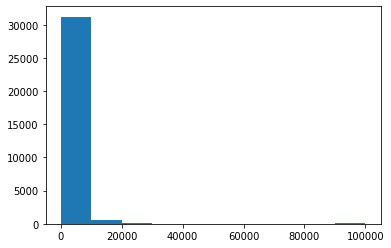

In [ ]:
plt.hist(ds_data['capital-gain'])

(array([3.0485e+04, 1.7000e+01, 2.1000e+01, 4.4600e+02, 7.6600e+02,
        2.0100e+02, 1.2000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

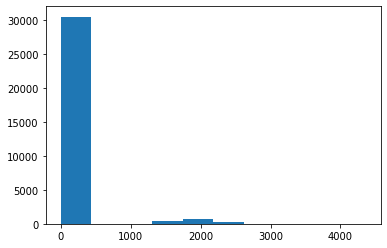

In [ ]:
plt.hist(ds_data['capital-loss'])

We see that these variables are mostly 0, so we will drop them as well

In [ ]:
ds_data = ds_data.drop(['capital-gain','capital-loss'], axis = 1)
ds_data

,age,education,occupation,race,sex,hours-per-week,native-country,sal_bin,gov_occup,private_occup,self_occup,married
0,39,3,Adm-clerical,1,1,40,United-States,0,1,0,0,0
1,50,3,Exec-managerial,1,1,13,United-States,0,0,0,0,1
2,38,1,Handlers-cleaners,1,1,40,United-States,0,0,1,0,0
3,53,0,Handlers-cleaners,0,1,40,United-States,0,0,1,0,1
4,28,3,Prof-specialty,0,0,40,Cuba,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,Tech-support,1,0,38,United-States,0,0,1,0,1
32557,40,1,Machine-op-inspct,1,1,40,United-States,1,0,1,0,1
32558,58,1,Adm-clerical,1,0,40,United-States,0,0,1,0,0
32559,22,1,Adm-clerical,1,1,20,United-States,0,0,1,0,0


Let's go on with countries

Next, occupation

In [ ]:
collections.Counter(list(ds_data['native-country']))

Counter({' Cambodia': 19,
         ' Canada': 121,
         ' China': 75,
         ' Columbia': 59,
         ' Cuba': 95,
         ' Dominican-Republic': 70,
         ' Ecuador': 28,
         ' El-Salvador': 106,
         ' England': 90,
         ' France': 29,
         ' Germany': 137,
         ' Greece': 29,
         ' Guatemala': 64,
         ' Haiti': 44,
         ' Holand-Netherlands': 1,
         ' Honduras': 13,
         ' Hong': 20,
         ' Hungary': 13,
         ' India': 100,
         ' Iran': 43,
         ' Ireland': 24,
         ' Italy': 73,
         ' Jamaica': 81,
         ' Japan': 62,
         ' Laos': 18,
         ' Mexico': 643,
         ' Nicaragua': 34,
         ' Outlying-US(Guam-USVI-etc)': 14,
         ' Peru': 31,
         ' Philippines': 197,
         ' Poland': 60,
         ' Portugal': 37,
         ' Puerto-Rico': 114,
         ' Scotland': 12,
         ' South': 80,
         ' Taiwan': 51,
         ' Thailand': 18,
         ' Trinadad&Tobago': 19,
      

We will create several binary vars for countries: Europe, USA_Can, SouthCenAm, Asia, Japan,


In [ ]:
ds_data['SouthCenAm'] = np.where((ds_data['native-country'] == ' Columbia')|(ds_data['native-country'] == ' Cuba')|(ds_data['native-country'] == ' Dominican-Republic')|(ds_data['native-country'] == ' Dominican-Republic')|(ds_data['native-country'] == ' Ecuador')|(ds_data['native-country'] == ' El-Salvador')|(ds_data['native-country'] == ' Guatemala')|(ds_data['native-country'] == ' Haiti')|(ds_data['native-country'] == ' Honduras')|(ds_data['native-country'] == ' Jamaica')|(ds_data['native-country'] == ' Mexico')|(ds_data['native-country'] == ' Nicaragua')|(ds_data['native-country'] == ' Peru')|(ds_data['native-country'] == ' Puerto-Rico')|(ds_data['native-country'] == ' Trinadad&Tobago'), 1,0)
ds_data['Japan'] = np.where((ds_data['native-country'] == ' Japan'), 1,0)
ds_data['Europe'] = np.where((ds_data['native-country'] == ' England')|(ds_data['native-country'] == ' France')|(ds_data['native-country'] == ' Germany')|(ds_data['native-country'] == ' Greece')|(ds_data['native-country'] == ' Holand-Netherlands')|(ds_data['native-country'] == ' Hungary')|(ds_data['native-country'] == ' Ireland')|(ds_data['native-country'] == ' Italy')|(ds_data['native-country'] == ' Poland')|(ds_data['native-country'] == ' Portugal')|(ds_data['native-country'] == ' Scotland')|(ds_data['native-country'] == ' Yugoslavia'), 1,0)
ds_data['UsaCan'] = np.where((ds_data['native-country'] == ' United-States')|(ds_data['native-country'] == ' Outlying-US(Guam-USVI-etc)')|(ds_data['native-country'] == ' Canada'), 1,0)
ds_data['Asia'] = np.where((ds_data['native-country'] == ' Cambodia')|(ds_data['native-country'] == ' China')|(ds_data['native-country'] == ' Hong')|(ds_data['native-country'] == ' India')|(ds_data['native-country'] == ' Iran')|(ds_data['native-country'] == ' Laos')|(ds_data['native-country'] == ' Philippines')|(ds_data['native-country'] == ' South')|(ds_data['native-country'] == ' Taiwan')|(ds_data['native-country'] == ' Thailand')|(ds_data['native-country'] == ' Vietnam'), 1,0)
ds_data = ds_data.drop(['native-country'], axis = 1)

We will drop armed-forces and one-hot encode all other occupations.

In [ ]:
ds_data = ds_data.drop(ds_data[(ds_data.occupation == ' Armed-Forces')].index)

In [ ]:
ds_data = pd.get_dummies(ds_data, columns = ['occupation'])

In [ ]:
ds_data.columns

Index(['age', 'education', 'race', 'sex', 'hours-per-week', 'sal_bin',
       'gov_occup', 'private_occup', 'self_occup', 'married', 'SouthCenAm',
       'Japan', 'Europe', 'UsaCan', 'Asia', 'occupation_ Adm-clerical',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving'],
      dtype='object')

New variables created are detailed versions of the "workclass" variable encoding, so we need only one of them in the final df. Hence, i create two versions, but will stick with the shorter one

In [ ]:
ds_cut = ds_data[['age', 'education', 'race', 'sex', 'hours-per-week',
        'sal_bin', 'gov_occup', 'private_occup', 'self_occup',
       'married','SouthCenAm', 'Japan', 'Europe', 'UsaCan', 'Asia']]

In [ ]:
ds_big = ds_data[['age', 'education', 'race', 'sex', 'hours-per-week','married','occupation_ Adm-clerical', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving','SouthCenAm', 'Japan', 'Europe', 'UsaCan', 'Asia']]

## **Logistic Regression**

In [ ]:
ds_cut

,age,education,race,sex,hours-per-week,sal_bin,gov_occup,private_occup,self_occup,married,SouthCenAm,Japan,Europe,UsaCan,Asia
0,39,3,1,1,40,0,1,0,0,0,0,0,0,1,0
1,50,3,1,1,13,0,0,0,0,1,0,0,0,1,0
2,38,1,1,1,40,0,0,1,0,0,0,0,0,1,0
3,53,0,0,1,40,0,0,1,0,1,0,0,0,1,0
4,28,3,0,0,40,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,1,0,38,0,0,1,0,1,0,0,0,1,0
32557,40,1,1,1,40,1,0,1,0,1,0,0,0,1,0
32558,58,1,1,0,40,0,0,1,0,0,0,0,0,1,0
32559,22,1,1,1,20,0,0,1,0,0,0,0,0,1,0


In [ ]:
y = ds_cut['sal_bin']
X = ds_cut.drop(['sal_bin'],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter = 1000).fit(X, y)

In [ ]:
probs = clf.predict_proba(X)
predictions = [list(x).index(max(list(x))) for x in probs]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
accuracy_score(y, predictions)

0.8099098535119569

In [ ]:
dict(zip(X.columns, list(clf.coef_[0])))

{'Asia': 0.1927395650343694,
 'Europe': 0.05749510151726056,
 'Japan': 0.6540592547042001,
 'SouthCenAm': -0.9259693646458332,
 'UsaCan': -0.05199702579589235,
 'age': 0.02985787315008108,
 'education': 0.5031098754852897,
 'gov_occup': 0.5500705153700545,
 'hours-per-week': 0.03577497755360961,
 'married': 2.2346408620000835,
 'private_occup': 0.3462378441311571,
 'race': 0.3074726057769441,
 'self_occup': 1.0081464799430666,
 'sex': 0.07537738522395117}

Let's add an iteraction sex*race

In [ ]:
ds_cut['sex_race'] = 1
ds_cut['sex_race'] = list(ds_cut['sex']*ds_cut['race'])

In [ ]:
y = ds_cut['sal_bin']
X = ds_cut.drop(['sal_bin'],axis=1)
clf = LogisticRegression(random_state=0,max_iter = 1000).fit(X, y)
probs = clf.predict_proba(X)
predictions = [list(x).index(max(list(x))) for x in probs]
predictions
accuracy_score(y, predictions)

0.8098472517841493

It did worse so let's drop it

In [ ]:
ds_cut = ds_cut.drop(['sex_race'], axis = 1)

## **Decision Tree/Forrest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

clf = DecisionTreeClassifier(random_state=0,max_depth = 5)
clf = clf.fit(X,y)
predictions = clf.predict(X)
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(y, predictions))
print('recall:', recall_score(y, predictions))

accuracy: 0.816295229748341
recall: 0.5353522225110475


In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=15000)
clf = clf.fit(X,y)
predictions = clf.predict(X)
print('accuracy:', accuracy_score(y, predictions))
print('recall:', recall_score(y, predictions))

accuracy: 0.7746024790284212
recall: 0.08305172861970367


Here we notice an alarming thing: we have terribly small recall rate. The reason for that is imbalanced target classes, as was found out in the beginning of the notebook.

Since the target class is imbalanced, we have to apply some sampling techniques: oversampling for class 1 or undersampling for class 0. Let's check them both

As oversampling method for class 1, I will use SMOTE (https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) for categorical data.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTENC
y = ds_cut['sal_bin']
X = ds_cut.drop(['sal_bin'],axis=1)
smote_nc = SMOTENC(categorical_features=list(range(1,14)), random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=15000)
clf = clf.fit(X_resampled,y_resampled)
predictions = clf.predict(X_resampled)
print('accuracy:', accuracy_score(y_resampled, predictions))
print('recall:', recall_score(y_resampled, predictions))

accuracy: 0.7863239053352025
recall: 0.8478189164673868


Much better! for undersampling let's try NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
y = ds_cut['sal_bin']
X = ds_cut.drop(['sal_bin'],axis=1)
nearmiss_nc = NearMiss()
X_resampled, y_resampled = nearmiss_nc.fit_resample(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=15000)
clf = clf.fit(X_resampled,y_resampled)
predictions = clf.predict(X_resampled)
print('accuracy:', accuracy_score(y_resampled, predictions))
print('recall:', recall_score(y_resampled, predictions))

accuracy: 0.727644918118014
recall: 0.7646217832076944


So, let's stick with oversampling and try some other methods. And also, let's try test/train split on over oversampled data

In [ ]:
from imblearn.over_sampling import SMOTENC
y = ds_cut['sal_bin']
X = ds_cut.drop(['sal_bin'],axis=1)
smote_nc = SMOTENC(categorical_features=list(range(1,14)), random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=69)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=1000)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print('accuracy:', accuracy_score(y_test, predictions))
print('recall:', recall_score(y_test, predictions))

accuracy: 0.7839830084957521
recall: 0.8462981490745373


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train ).predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

accuracy: 0.7548100949525237
recall: 0.7760130065032517


NB has shown not a really good performance, so RandomForest is the winner in this competition of traditional ML approaches. However, let's try something else

## **Neural Networks**

So, we have seen how tradishional ML methods performs, let's try a simple NN for this data with Sigmoid activation function

In [186]:
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   
import tensorflow.keras.layers as L              
import tensorflow.keras.optimizers as opt        
from tensorflow.keras.utils import to_categorical
from torchmetrics import Accuracy

2.8.2
2.8.0


In [188]:
tf.random.set_seed(7)

In [193]:
keras.backend.clear_session()
def MLI( ):
    acc = Accuracy()

    ###########################################################

    model = Sequential(name = 'Na_mne_cash')  
    
    model.add(L.Dense(10, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    model.add(L.Dense(16, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    model.add(L.Dense(6, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    model.add(L.Dense(1, activation='sigmoid', kernel_initializer = 'random_normal'))
    
    ###########################################################

    optimizer = opt.Adam(learning_rate=2e-4)

    model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

model = MLI( )

In [194]:
model.summary()

Model: "Na_mne_cash"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                176       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 activation_2 (Activation)   (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [195]:
hist = model.fit(X_train.values.astype(np.float32), y_train.astype(np.float32), validation_split=0.2, epochs=500, verbose=1, batch_size=64)

Epoch 1/500
407/407 [==============================] - 2s 3ms/step - loss: 0.6934 - acc: 0.4997 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 2/500
407/407 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5177 - val_loss: 0.6930 - val_acc: 0.5025
Epoch 3/500
407/407 [==============================] - 1s 2ms/step - loss: 0.6929 - acc: 0.5050 - val_loss: 0.6927 - val_acc: 0.4975
Epoch 4/500
407/407 [==============================] - 1s 3ms/step - loss: 0.6923 - acc: 0.6099 - val_loss: 0.6916 - val_acc: 0.6457
Epoch 5/500
407/407 [==============================] - 1s 2ms/step - loss: 0.6895 - acc: 0.6617 - val_loss: 0.6862 - val_acc: 0.6617
Epoch 6/500
407/407 [==============================] - 1s 2ms/step - loss: 0.6769 - acc: 0.6818 - val_loss: 0.6645 - val_acc: 0.6925
Epoch 7/500
407/407 [==============================] - 1s 2ms/step - loss: 0.6427 - acc: 0.7134 - val_loss: 0.6174 - val_acc: 0.7435
Epoch 8/500
407/407 [==============================] - 1s 2ms/step - 

We see that a simple neural network yields ~0.8 accuracy, which is the best result. Probably, the result can be developed by bigger dataset and some more experiments with layers.

In [198]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter = 1000).fit(X_resampled, y_resampled)
probs = clf.predict_proba(X_resampled)
predictions = [list(x).index(max(list(x))) for x in probs]
print('accuracy:', accuracy_score(y_resampled, predictions))
dict(zip(X_resampled.columns, list(clf.coef_[0])))

accuracy: 0.7806547373629092


{'Asia': -0.6190019639463461,
 'Europe': -0.9886378683573926,
 'Japan': -0.4321027524194089,
 'SouthCenAm': -1.9527326069564637,
 'UsaCan': -1.000919599495989,
 'age': 0.0328723919121151,
 'education': 0.5048089615079611,
 'gov_occup': 0.4243576285043126,
 'hours-per-week': 0.043134496313902364,
 'married': 2.3067954808201807,
 'private_occup': 0.21259923652850637,
 'race': 0.444822877700633,
 'self_occup': 0.8064322449841081,
 'sex': 0.11582345979748349}

Even though, the accuracy here is not the highest, we can assess what are the most singificant predictors of a person's salary in Japan. We see, that people from all of the Americas tend to earn less than and Asians, Europeans and Japanese. We can cocnlcude that the most wealthy people in Japan are Japanese married males with higher education working full time for the government. 